<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div> 

Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 
    
# 24: Ordinary Functions as Predictor-Response Models
- Line (affine functions) 
- Polynomials  
- Periodic

Data Models for Predictor-Response.

<!--![](http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson13/PsuedoLesson/roulette.png)-->

## Objectives
- To understand the fundamental concepts involved in representing a data collection with some functional form to make predictions;
  - Interpolation
  - Extrapolation
  - Concept of a fitting function
  
## Computational Thinking Concepts
The CT concepts include:

- Decomposition => Assert data are drawn from some process that is functionally explainable
- Abstraction => Represent data behavior with a function 
- Algorithm Design =>  Use the function to predict "new" values of observations

## Explaining Data

Interpolation and extrapolation were discussed earlier in the course, here we will revist in a prelude to regression tools.  Data modeling as used herein has two related but quite different approaches.  First (as discussed here) is a predictor-response type model, the second is a magnitude-probability type model (which is discussed in the subsequent lesson).

In predictor-response, we are seeking a functional form (and parameters) that relate a predictor variable to a response so we can use the **model** to predict anticipated responses to different predictor inputs.

Recall our speed and time example, repeated below.

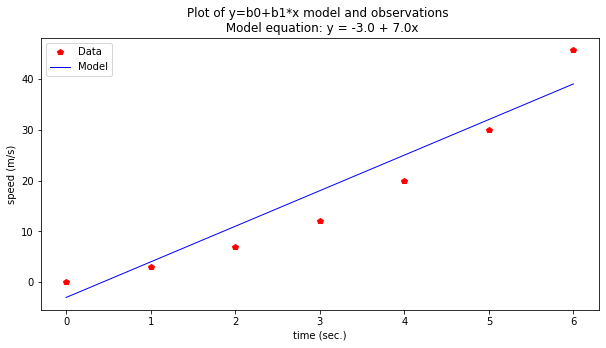

In [46]:
# Our data
time = [0,1.0,2.0,3.0,4.0,5.0,6.0]
speed = [0,3,7,12,20,30,45.6]
# Our data model
def poly1(b0,b1,x):
    # return y = b0 + b1*x
    poly1=b0+b1*x
    return(poly1)
# Our plotting function
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='p',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
#    plt.plot(listx3,listy3, c='green',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
# Our "fitting" process
intercept = -3.0
slope = 7.0
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(poly1(intercept,slope,time[i]))
# Plotting results
charttitle="Plot of y=b0+b1*x model and observations \n" + " Model equation: y = " + str(intercept) + " + " + str(slope) + "x"
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)',charttitle)

So the data model is $y=-3.0 + 7x$ and we can assess how "good" the model is by some measure of error (sum of squared error, max error, and various other measures).  We could also postulate another data model as

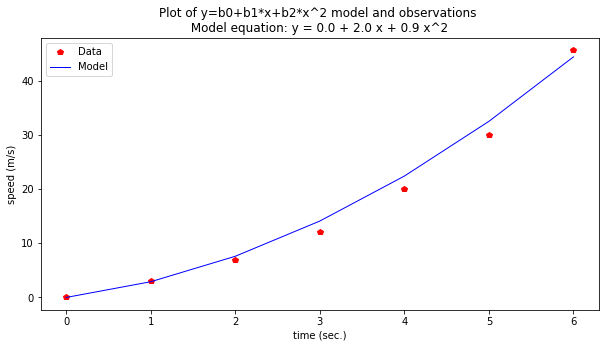

In [47]:
def poly2(b0,b1,b2,x):
    # return y = b0 + b1*x
    poly2=b0+b1*x+b2*x**2
    return(poly2)

# Our "fitting" process
intercept = 0.0
slope = 2.0
curvature = 0.9
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(poly2(intercept,slope,curvature,time[i]))
# Plotting results
charttitle="Plot of y=b0+b1*x+b2*x^2 model and observations \n" + " Model equation: y = " + str(intercept) + " + " + str(slope) + " x + " + str(curvature) + " x^2 " 
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)',charttitle)

Now this model appears visibly "superior" and we would anticipate that the error measurement would be smaller than the previous model.  If we decided our second model was awesome, we now have a prediction tool.

Our model is $y = 0.0 + 2.0 x + 0.9 x^2$ so if we wished to predict the speed at time 11 seconds we would simply evaluate the function using the parameters at $x=11$

In [48]:
print("Speed @ time = 11 sec. is ",poly2(intercept,slope,curvature,11)," meters per second")

Speed @ time = 11 sec. is  130.9  meters per second


Now we will examine a few common kinds of predictor-response models.

### Additive Models
A function that produces a line is called an affine function.  In the example above, we have only a single predictor variable, but we can have multiple predictors.  If the multiple predictors are additive the model will look like:

$$y = \beta_0 + \beta_{11}*u +\beta_{12}*v + \beta_{13}*w$$

where $u,v,w$ are predictors

### Polynomials and Product Models

In the example above, we have only additive predictor variables, but we can form products of predictors.  Product models will look like:

$$y = \beta_0 + \beta_{11}*u +\beta_{12}*v + \beta_{13}*w +\beta_{21}*u^2 +\beta_{22}*uv + \beta_{23}*uw + \beta_{31}*uv +\beta_{32}*v^2 + \beta_{33}*wv +\beta_{41}*uw +\beta_{42}*vw + \beta_{43}*w^2$$

where $u,v,w$ are predictors.

If the product model is simply powers of single predictors the model is called a polynomial model such as:

$$y = \beta_0 + \beta_{11}*u +\beta_{21}*u^2 + \beta_{31}*u^3 +\beta_{41}*u^4 +\dots$$

Often the coefficient list is stored as a matrix, and this is called a design matrix.  

#### Polynomial Example 
Consider the data collected during the boost-phase of a ballistic missle.  The maximum speed of a solid-fueled missle at burn-out (when the boost-phase ends) is about 7km/s. Using this knowledge and the early-time telemetry below; fit a data model using the linear system approach and use the model to estimate boost phase burn-out.  Plot the model and data on the same axis to demonstrate the quality of the fit.

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7.4|
|3.0 |16.2|
|4.0 |23.5|
|5.0 |32.2|
|6.0 | 42.2| 
|7.0 | 65.1 |
|8.0 | 73.5 |
|9.0 | 99.3 |
|10.0| 123.4|

#### Design Matrix
The data model as a linear system is:

$$\begin{gather}
\mathbf{X} \cdot \mathbf{\beta} = \mathbf{Y}
\end{gather}$$

For example using the Polynomial Model (order 2 for brevity, but extendable as justified)

$$
\begin{gather}
\mathbf{X}=
\begin{pmatrix}
1 & x_1 & x_1^2\\
~\\
1 & x_2 & x_2^2\\
~ \\
1 & x_3 & x_3^2\\
\dots & \dots & \dots \\
1 & x_n & x_n^2\\
\end{pmatrix}
\end{gather}
$$

$$
\begin{gather}
\mathbf{\beta}=
\begin{pmatrix}
\beta_0 \\
~\\
\beta_1 \\
~ \\
\beta_2 \\
\end{pmatrix}
\end{gather}
$$

$$
\begin{gather}
\mathbf{X}=
\begin{pmatrix}
y_1 \\
~\\
y_2 \\
~ \\
y_3 \\
\dots  \\
y_n \\
\end{pmatrix}
\end{gather}
$$

A way to find the unknown $\beta$ values is to solve the linear system below 

$$\begin{gather}
[\mathbf{X^T}\mathbf{X}] \cdot \mathbf{\beta} = [\mathbf{X^T}]\mathbf{Y}
\end{gather}$$

Once the values for $\beta$ are obtained then we can apply our plotting tools and use the model to extrapolate and interpolate.  

In [59]:
# start with the early-time data
time = [0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
speed = [0,3,7.4,16.2,23.5,32.2,42.2, 65.1 ,73.5 ,99.3 ,123.4,]

In [60]:
# trial-and-error approach
# our data model
def polynomial(b0,b1,b2,time):
    polynomial = b0+b1*time+b2*time**2
    return(polynomial)
# our "goodness" measure
def sqerr(a,b):
    sqerr = (a-b)**2
    return(sqerr)

In [61]:
#########################################
x = [0.0,0.2,1.5] # our "guessed" betas; these are all just guesses - how would you make a way to update the guess?
#########################################

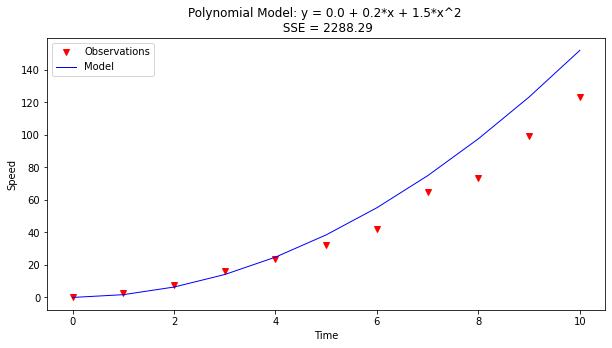

Estimated time to burn-out is:  79.0  seconds;  Speed at burn-out is:  9377.3  meters/second


In [62]:
# build our data model to plot
my_model = [0 for i in range(len(time))]
for i in range(len(time)):
    my_model[i] = polynomial(x[0],x[1],x[2],time[i])

# evaluate the model fit
err = 0
for i in range(len(time)):
    err = err + sqerr(my_model[i],speed[i])

# our plotting tool
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

# build our plot
plottitle = "Polynomial Model: y = " + str(x[0]) + " + " + str(x[1]) + "*x + " + str(x[2]) + "*x^2 \n" + " SSE = " +str(round(err,3))
make2plot(time,speed,time,my_model,"Time","Speed",plottitle);

# estimate time to burnout
ttb = 79.
print('Estimated time to burn-out is: ',ttb,' seconds;  Speed at burn-out is: ',polynomial(x[0],x[1],x[2],ttb),' meters/second')


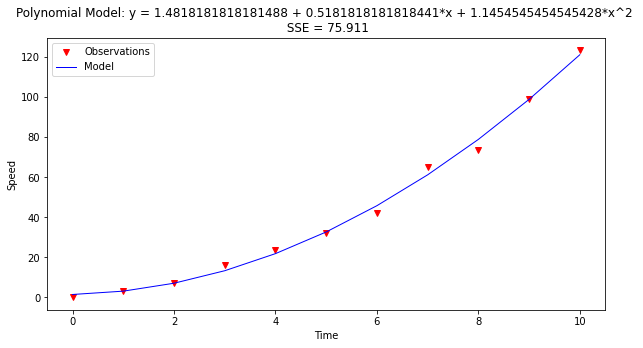

Estimated time to burn-out is:  77.79  seconds;  Speed at burn-out is:  6973.262059999987  meters/second


In [69]:
# solving the linear system to make a model
##############################
import numpy
X = [numpy.ones(len(time)),numpy.array(time),numpy.array(time)**2] # build the design X matrix #
X = numpy.transpose(X) # get into correct shape for linear solver
Y = numpy.array(speed) # build the response Y vector
A = numpy.transpose(X)@X # build the XtX matrix
b = numpy.transpose(X)@Y # build the XtY vector
x = numpy.linalg.solve(A,b) # avoid inversion and just solve the linear system 
#print(x)
def polynomial(b0,b1,b2,time):
    polynomial = b0+b1*time+b2*time**2
    return(polynomial)

my_model = [0 for i in range(len(time))]
for i in range(len(time)):
    my_model[i] = polynomial(x[0],x[1],x[2],time[i])

# evaluate the model fit
err = 0
for i in range(len(time)):
    err = err + sqerr(my_model[i],speed[i])

import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

plottitle = "Polynomial Model: y = " + str(x[0]) + " + " + str(x[1]) + "*x + " + str(x[2]) + "*x^2 \n" + " SSE = " +str(round(err,3))
make2plot(time,speed,time,my_model,"Time","Speed",plottitle);

ttb = 77.79
print('Estimated time to burn-out is: ',ttb,' seconds;  Speed at burn-out is: ',polynomial(x[0],x[1],x[2],ttb),' meters/second')


### Power-Law Models

A power-law model is a model of the form:

$y = \beta_{0}*u^{\beta_1}$

One can join multiple power-law models (if they wish) in an additive or even a product model fashion; in such instances some physical understanding of the process is needed, to make reasonably useful models.


In [52]:
# example goes here

### Logarithmic Models

A logarithmic model is a model of the form:

$y = \beta_{0}+\beta{_1}log(u)$

In [53]:
# example goes here

### Periodic Models

Models with periodic (repeating behavior) are often a special challenge and are often dealt with using transformations (LaPlace, Fourier, $\dots$)

## References

<hr>

## Laboratory 24

**Examine** (click) Laboratory 24 as a webpage at [Laboratory 24.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab24/Lab24.html)

**Download** (right-click, save target as ...) Laboratory 24 as a jupyterlab notebook from [Laboratory 24.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab24/Lab24.ipynb)


<hr><hr>

## Exercise Set 24

**Examine** (click) Exercise Set 24 as a webpage at [Exercise 24.html](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab24/Lab24-TH.html)

**Download** (right-click, save target as ...) Exercise Set 24 as a jupyterlab notebook at  [Exercise Set 24.ipynb](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab24/Lab24-TH.ipynb)

